In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix # import the confusion matrix function
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics


C:\Users\Loc Sensei\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
train_df = pd.read_csv('Rossmann_train.csv', low_memory=False)
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [3]:
train_df['Date'] = pd.to_datetime(train_df['Date'])

train_df['year']= train_df['Date'].dt.year
train_df['month']= train_df['Date'].dt.month
train_df['day']= train_df['Date'].dt.day
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
train_df['day_of_week_name']=train_df['Date'].dt.weekday.map(dw_mapping)

train_df['SalePerCustomer'] = (train_df['Sales']/train_df['Customers']).round()

train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,day_of_week_name,SalePerCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,Friday,9.0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,Friday,10.0
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,Friday,10.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,Friday,9.0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,Friday,9.0


In [4]:
train_df=pd.get_dummies(train_df, columns =['StateHoliday'])
train_df=train_df.fillna(0) 
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,day_of_week_name,SalePerCustomer,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,2015,7,31,Friday,10.0,1,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,2015,7,31,Friday,10.0,1,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,2015,7,31,Friday,9.0,1,0,0,0


In [5]:
new_train = train_df.copy()

new_train = new_train.drop(["Date","day_of_week_name","SalePerCustomer"],axis=1)
new_train


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,5263,555,1,1,1,2015,7,31,1,0,0,0
1,2,5,6064,625,1,1,1,2015,7,31,1,0,0,0
2,3,5,8314,821,1,1,1,2015,7,31,1,0,0,0
3,4,5,13995,1498,1,1,1,2015,7,31,1,0,0,0
4,5,5,4822,559,1,1,1,2015,7,31,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,1,2013,1,1,0,1,0,0
1017205,1112,2,0,0,0,0,1,2013,1,1,0,1,0,0
1017206,1113,2,0,0,0,0,1,2013,1,1,0,1,0,0
1017207,1114,2,0,0,0,0,1,2013,1,1,0,1,0,0


In [6]:
Sales_bin = pd.cut(new_train['Sales'], 3, precision=2)
new_train['Bin'] = Sales_bin
new_train['Sales_bin_code'] = new_train.Bin.cat.codes
print(Sales_bin)
focus_train = new_train.drop(['Bin'], axis = 1)
focus_train.loc[(focus_train['Sales_bin_code']==2)]

0            (-41.55, 13850.33]
1            (-41.55, 13850.33]
2            (-41.55, 13850.33]
3          (13850.33, 27700.67]
4            (-41.55, 13850.33]
                   ...         
1017204      (-41.55, 13850.33]
1017205      (-41.55, 13850.33]
1017206      (-41.55, 13850.33]
1017207      (-41.55, 13850.33]
1017208      (-41.55, 13850.33]
Name: Sales, Length: 1017209, dtype: category
Categories (3, interval[float64, right]): [(-41.55, 13850.33] < (13850.33, 27700.67] < (27700.67, 41551.0]]


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Sales_bin_code
5301,842,1,27881,1493,1,1,0,2015,7,27,1,0,0,0,2
5836,262,7,32547,4783,1,0,0,2015,7,26,1,0,0,0,2
13641,262,7,31665,4691,1,0,0,2015,7,19,1,0,0,0,2
21183,1114,1,28156,3592,1,1,0,2015,7,13,1,0,0,0,2
21446,262,7,32271,4623,1,0,0,2015,7,12,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979001,817,1,31649,4067,1,1,1,2013,2,4,1,0,0,0,2
979561,262,7,28921,4144,1,0,0,2013,2,3,1,0,0,0,2
994611,817,1,30667,3900,1,1,0,2013,1,21,1,0,0,0,2
1009106,817,2,28050,3862,1,1,0,2013,1,8,1,0,0,0,2


In [7]:
X = focus_train[['Customers','Promo']]
Y = focus_train['Sales_bin_code']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

Text(0, 0.5, 'accuracy')

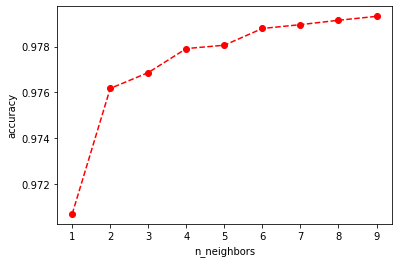

In [9]:
Accuracy = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    Accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
plt.plot(range(1,10), Accuracy, color = 'red', linestyle = 'dashed', marker = 'o')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')

In [10]:
knn = KNeighborsClassifier(n_neighbors = 9).fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred)


0.9793307183374131

C:\Users\Loc Sensei\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Promo')

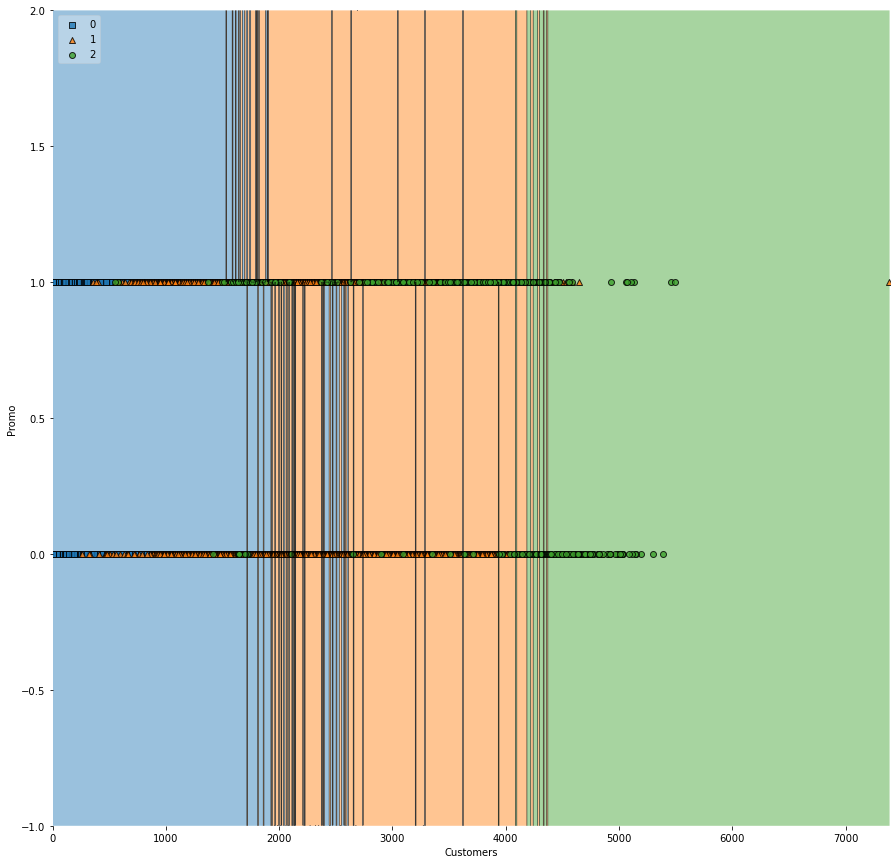

In [11]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

X =focus_train[['Customers','Promo']].to_numpy()
Y =focus_train['Sales_bin_code'].to_numpy()

plt.figure(figsize=(15, 15))
plot_decision_regions(X, Y, clf=knn, legend = 2)
plt.xlabel("Customers")
plt.ylabel("Promo")

Insights: 
* We can classify the sales based on the customers range:
    - Bad sales: 0-1900
    - Medium sales: 1900 - 4200
    - Excellent: > 4200 

* Promo:
    - No promo:
        -  with just 0-1900 customers we expect the sales in the bad range and in medium range 
        - with 1900-4200 customers we expect medium range of sales + a bit more excellent range of sales
    - with promo:
        - with 0-1500 customers, there are more green circles (representing sales in excellent range) => We expect a lot more medium and high range of sales
        - with 1500-4200 customers, a majority of sales in excellent range is observed 
        - Of course, promo does not matter when number of customers > 4200
    
    
=> Knn model showcases how sales distribute based on my chosen X-features, in this case, customers and promo

## Modelling 

In [6]:
for_model = train_df.copy()

for_model

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,day_of_week_name,SalePerCustomer,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,2015,7,31,Friday,10.0,1,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,2015,7,31,Friday,10.0,1,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0
1017205,1112,2,2013-01-01,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0


In [7]:
#use = for_model[for_model['Sales'] != 0]
X_1 = for_model.drop(['Sales','day_of_week_name',"SalePerCustomer","Date"],axis=1)
Y_1 = for_model['Sales']
X_1

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,year,month,day,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,555,1,1,1,2015,7,31,1,0,0,0
1,2,5,625,1,1,1,2015,7,31,1,0,0,0
2,3,5,821,1,1,1,2015,7,31,1,0,0,0
3,4,5,1498,1,1,1,2015,7,31,1,0,0,0
4,5,5,559,1,1,1,2015,7,31,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,1,2013,1,1,0,1,0,0
1017205,1112,2,0,0,0,1,2013,1,1,0,1,0,0
1017206,1113,2,0,0,0,1,2013,1,1,0,1,0,0
1017207,1114,2,0,0,0,1,2013,1,1,0,1,0,0


In [8]:
nX = (X_1-X_1.mean())/X_1.std()
nX

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,year,month,day,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,-1.731639,0.501484,-0.168269,0.452398,1.273236,2.14421,1.502076,0.346724,1.740765,0.177442,-0.142555,-0.081366,-0.063616
1,-1.728533,0.501484,-0.017540,0.452398,1.273236,2.14421,1.502076,0.346724,1.740765,0.177442,-0.142555,-0.081366,-0.063616
2,-1.725427,0.501484,0.404499,0.452398,1.273236,2.14421,1.502076,0.346724,1.740765,0.177442,-0.142555,-0.081366,-0.063616
3,-1.722320,0.501484,1.862257,0.452398,1.273236,2.14421,1.502076,0.346724,1.740765,0.177442,-0.142555,-0.081366,-0.063616
4,-1.719214,0.501484,-0.159656,0.452398,1.273236,2.14421,1.502076,0.346724,1.740765,0.177442,-0.142555,-0.081366,-0.063616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1.716544,-1.000475,-1.363329,-2.210439,-0.785399,2.14421,-1.070615,-1.457192,-1.673122,-5.635630,7.014820,-0.081366,-0.063616
1017205,1.719650,-1.000475,-1.363329,-2.210439,-0.785399,2.14421,-1.070615,-1.457192,-1.673122,-5.635630,7.014820,-0.081366,-0.063616
1017206,1.722757,-1.000475,-1.363329,-2.210439,-0.785399,2.14421,-1.070615,-1.457192,-1.673122,-5.635630,7.014820,-0.081366,-0.063616
1017207,1.725863,-1.000475,-1.363329,-2.210439,-0.785399,2.14421,-1.070615,-1.457192,-1.673122,-5.635630,7.014820,-0.081366,-0.063616


In [9]:
X_1 = nX
X_1 = X_1.rename({'StateHoliday_0': 'No_holiday', 'StateHoliday_a': 'Public','StateHoliday_b': 'Easter','StateHoliday_c': 'Christmas', }, axis=1)

#X_1=pd.get_dummies(X_1, columns =['year'])
#x
x = X_1.copy()
x

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,year,month,day,No_holiday,Public,Easter,Christmas
0,-1.731639,0.501484,-0.168269,0.452398,1.273236,2.14421,1.502076,0.346724,1.740765,0.177442,-0.142555,-0.081366,-0.063616
1,-1.728533,0.501484,-0.017540,0.452398,1.273236,2.14421,1.502076,0.346724,1.740765,0.177442,-0.142555,-0.081366,-0.063616
2,-1.725427,0.501484,0.404499,0.452398,1.273236,2.14421,1.502076,0.346724,1.740765,0.177442,-0.142555,-0.081366,-0.063616
3,-1.722320,0.501484,1.862257,0.452398,1.273236,2.14421,1.502076,0.346724,1.740765,0.177442,-0.142555,-0.081366,-0.063616
4,-1.719214,0.501484,-0.159656,0.452398,1.273236,2.14421,1.502076,0.346724,1.740765,0.177442,-0.142555,-0.081366,-0.063616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1.716544,-1.000475,-1.363329,-2.210439,-0.785399,2.14421,-1.070615,-1.457192,-1.673122,-5.635630,7.014820,-0.081366,-0.063616
1017205,1.719650,-1.000475,-1.363329,-2.210439,-0.785399,2.14421,-1.070615,-1.457192,-1.673122,-5.635630,7.014820,-0.081366,-0.063616
1017206,1.722757,-1.000475,-1.363329,-2.210439,-0.785399,2.14421,-1.070615,-1.457192,-1.673122,-5.635630,7.014820,-0.081366,-0.063616
1017207,1.725863,-1.000475,-1.363329,-2.210439,-0.785399,2.14421,-1.070615,-1.457192,-1.673122,-5.635630,7.014820,-0.081366,-0.063616


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(x, Y_1, test_size=0.2, random_state=42) 

In [11]:
# Construct and fit the model
linear = LinearRegression()  # Instantatiate the linear regression model
linear.fit(X_train,Y_train)  # Fit the model parameters to the training data.

# Evaluate model performance.
training_predictions = linear.predict(X_train)  
testing_predictions = linear.predict(X_test)    


training_score = linear.score(X_train,Y_train) 

rsquared_linear = r2_score(Y_test,testing_predictions)

print(f'Training score with optimal alpha is {training_score:.3f}')
print(f'Testing score with optimal alpha is {rsquared_linear:.3f}')
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, testing_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, testing_predictions)))

Training score with optimal alpha is 0.855
Testing score with optimal alpha is 0.853
Mean Absolute Error: 985.4082789432055
Root Mean Squared Error: 1474.8894266990071


In [12]:
data = {"Y_test" : Y_test,"Predictions":testing_predictions}
df = pd.DataFrame(data)
df

,Y_test,Predictions
76435,0,129.969524
923026,5548,7284.344524
731180,7467,8516.157024
790350,3360,3789.125774
252134,11414,8579.891399
...,...,...
574924,8822,5806.672649
752038,11716,8294.516399
38978,3375,4127.516399
193217,0,63.219524


In [13]:
feature_names = x.columns.tolist() # write the column names to a list

# create a Series for which the rows are the feature names and the data is 
# the regression coefficient values
coefficients = pd.Series(data=linear.coef_.transpose(), index=feature_names)
print(coefficients.round(0))
print("Intercept is",linear.intercept_.round(0))

Store           -4.800000e+01
DayOfWeek       -1.550000e+02
Customers        2.809000e+03
Open             5.620000e+02
Promo            6.260000e+02
SchoolHoliday    1.600000e+01
year             1.120000e+02
month            1.140000e+02
day              4.000000e+00
No_holiday      -4.247211e+14
Public          -3.449497e+14
Easter          -1.995652e+14
Christmas       -1.564298e+14
dtype: float64
Intercept is 5774.0


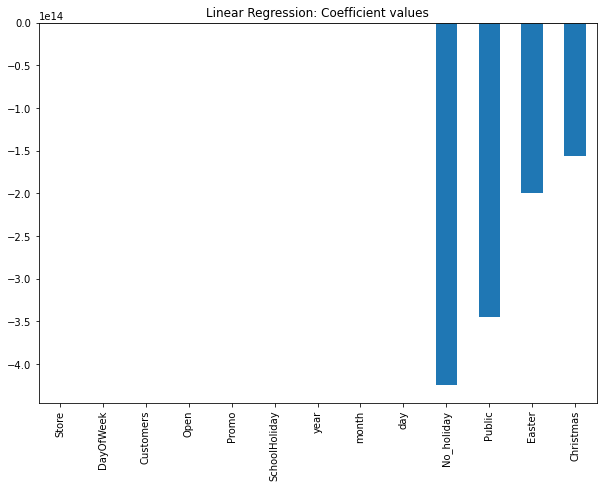

In [14]:
coefficients.plot(kind='bar', figsize=(10, 7)) # plot these as a bar plot
plt.title('Linear Regression: Coefficient values') # add a title
plt.axhline(y=0, color='.5') # add the reference line y = 0


- Now we try excluding the Public, Easter, Christmas variables and kept the No_holiday. This is because by using No_holiday, now we only care if it is a holiday or not. 

In [15]:
x_1 = x.drop(["Public","Easter","Christmas"],axis=1)

In [16]:

X_train, X_test, Y_train, Y_test = train_test_split(x_1, Y_1, test_size=0.2, random_state=42) 
# Construct and fit the model
linear_1 = LinearRegression()  # Instantatiate the linear regression model
linear_1.fit(X_train,Y_train)  # Fit the model parameters to the training data.

# Evaluate model performance.
training_predictions = linear_1.predict(X_train)  
testing_predictions = linear_1.predict(X_test)    


training_score = linear_1.score(X_train,Y_train) 

rsquared_linear = r2_score(Y_test,testing_predictions)

print(f'Training score with optimal alpha is {training_score:.3f}')
print(f'Testing score with optimal alpha is {rsquared_linear:.3f}')
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, testing_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, testing_predictions)))

Training score with optimal alpha is 0.855
Testing score with optimal alpha is 0.853
Mean Absolute Error: 986.703427091447
Root Mean Squared Error: 1475.1108481350504


In [17]:
x_1


,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,year,month,day,No_holiday
0,-1.731639,0.501484,-0.168269,0.452398,1.273236,2.14421,1.502076,0.346724,1.740765,0.177442
1,-1.728533,0.501484,-0.017540,0.452398,1.273236,2.14421,1.502076,0.346724,1.740765,0.177442
2,-1.725427,0.501484,0.404499,0.452398,1.273236,2.14421,1.502076,0.346724,1.740765,0.177442
3,-1.722320,0.501484,1.862257,0.452398,1.273236,2.14421,1.502076,0.346724,1.740765,0.177442
4,-1.719214,0.501484,-0.159656,0.452398,1.273236,2.14421,1.502076,0.346724,1.740765,0.177442
...,...,...,...,...,...,...,...,...,...,...
1017204,1.716544,-1.000475,-1.363329,-2.210439,-0.785399,2.14421,-1.070615,-1.457192,-1.673122,-5.635630
1017205,1.719650,-1.000475,-1.363329,-2.210439,-0.785399,2.14421,-1.070615,-1.457192,-1.673122,-5.635630
1017206,1.722757,-1.000475,-1.363329,-2.210439,-0.785399,2.14421,-1.070615,-1.457192,-1.673122,-5.635630
1017207,1.725863,-1.000475,-1.363329,-2.210439,-0.785399,2.14421,-1.070615,-1.457192,-1.673122,-5.635630


In [18]:
feature_names = x_1.columns.tolist() # write the column names to a list

# create a Series for which the rows are the feature names and the data is 
# the regression coefficient values
coefficients = pd.Series(data=linear_1.coef_.transpose(), index=feature_names)
print(coefficients.round(0))
print("Intercept is",linear_1.intercept_.round(0))

Store             -48.0
DayOfWeek        -154.0
Customers        2809.0
Open              562.0
Promo             625.0
SchoolHoliday      16.0
year              112.0
month             117.0
day                 6.0
No_holiday        132.0
dtype: float64
Intercept is 5774.0


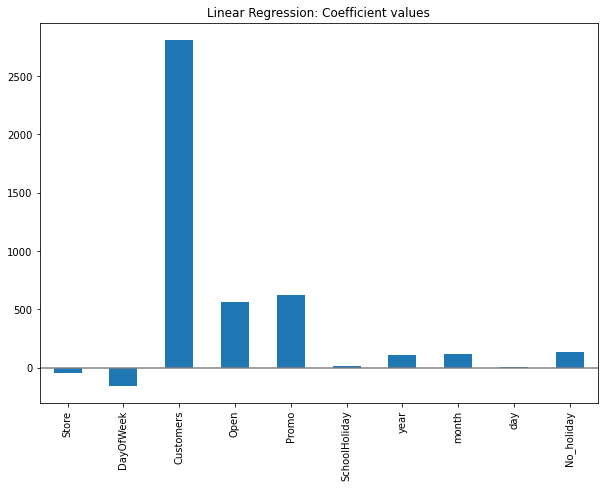

In [19]:
coefficients.plot(kind='bar', figsize=(10, 7)) # plot these as a bar plot
plt.title('Linear Regression: Coefficient values') # add a title
plt.axhline(y=0, color='.5') # add the reference line y = 0


### RandomForest Regressor 

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(x_1, Y_1, test_size=0.2, random_state=42) 
regressor_1 = RandomForestRegressor(n_estimators=20, random_state=0)
regressor_1.fit(X_train, Y_train)

training_predictions = regressor_1.predict(X_train)  # Get model predictions for both.
testing_predictions = regressor_1.predict(X_test)    # training and testing data.

training_score = regressor_1.score(X_train,Y_train) # calculate rsq for the training set

rsquared_linear = r2_score(Y_test,testing_predictions)

In [32]:
data_rand = {"Y_test" : Y_test,"Predictions":testing_predictions}
df_1 = pd.DataFrame(data_rand)
df_1

,Y_test,Predictions
76435,0,0.00
923026,5548,5800.40
731180,7467,7779.75
790350,3360,3549.35
252134,11414,9871.80
...,...,...
574924,8822,8186.05
752038,11716,10089.65
38978,3375,3826.85
193217,0,0.00


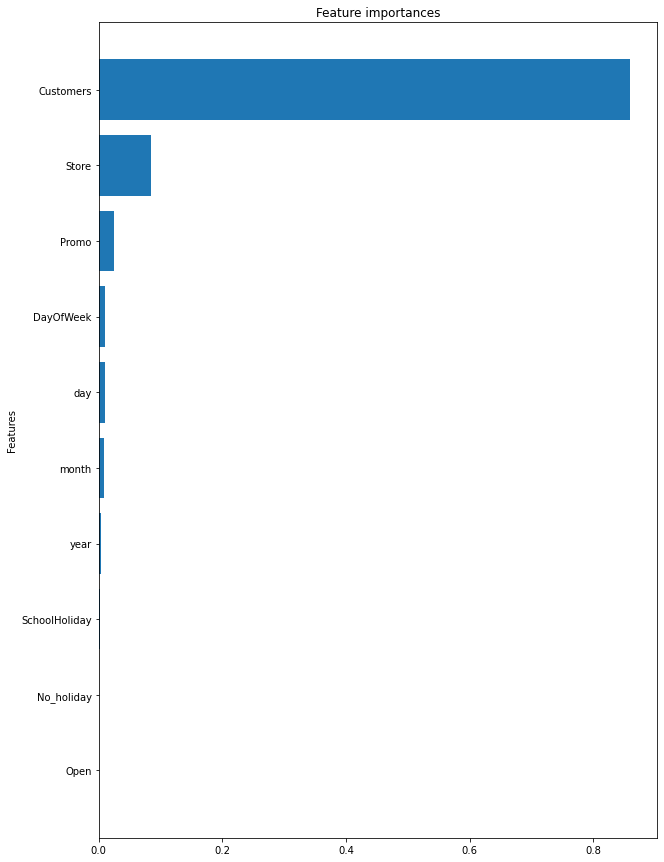

In [33]:
importances = regressor_1.feature_importances_
std = np.std([regressor_1.feature_importances_ for tree in regressor_1.estimators_],
             axis=0)
indices = np.argsort(importances)
# Store the feature ranking
features_ranked=[]
for f in range(X_train.shape[1]):
    features_ranked.append(X_train.columns[indices[f]])
# Plot the feature importances of the forest

plt.figure(figsize=(10,15))
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), features_ranked)
plt.ylabel('Features')
plt.show()

In [34]:
print("Training score is",np.round(training_score, 3))
print("Testing score is",np.round(rsquared_linear, 3))

Training score is 0.993
Testing score is 0.955


In [35]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, testing_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, testing_predictions)))

Mean Absolute Error: 482.13646960804556
Root Mean Squared Error: 811.3164046809673


### LassoCV

In [36]:
from sklearn.linear_model import LassoCV
X_train, X_test, Y_train, Y_test = train_test_split(x_1, Y_1, test_size=0.2, random_state=42) 
# create an array of 21 alpha values logarithmically distributed between 10**(-2) and 10**2
alfas = np.logspace(-2, 2, num=21) 

lassocv = LassoCV(alphas = alfas)

# Now you will need to fit the model on the train data using the instantiated model lassocv, determine the training
# and testing R^2 scores

lassocv.fit(X_train,Y_train)
preds_linear = lassocv.predict(X_test)
testing_score = r2_score(Y_test,preds_linear) 
training_score = lassocv.score(X_train,Y_train) 

optimal_parameter = lassocv.alpha_


print(f'Optimal alpha is {optimal_parameter:.3f}')

print(f'Training score with optimal alpha is {training_score:.3f}')
print(f'Testing score with optimal alpha is {testing_score:.3f}')
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, preds_linear))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, preds_linear)))

Optimal alpha is 0.010
Training score with optimal alpha is 0.855
Testing score with optimal alpha is 0.853
Mean Absolute Error: 986.7006029623786
Root Mean Squared Error: 1475.1108072476316


### RidgeCV

In [37]:
from sklearn.linear_model import RidgeCV

# create an array of 21 alpha values logarithmically distributed between 10**(-2) and 10**2
alfas = np.logspace(-2, 2, num=21) 

X_train, X_test, Y_train, Y_test = train_test_split(x_1, Y_1, test_size=0.2, random_state=42) 
ridgecv = RidgeCV(alfas)

# Now you will need to fit the model on the train data using the instantiated model ridgecv, determine the training and testing R^2 scores, 
ridgecv.fit(X_train,Y_train)
preds_linear = ridgecv.predict(X_test)
testing_score = r2_score(Y_test,preds_linear) 
training_score = ridgecv.score(X_train,Y_train) 


print(f'Training score with optimal alpha is {training_score:.3f}')
print(f'Testing score with optimal alpha is {testing_score:.3f}')
#then call .alpha_ to find the optimal tuning parameter.
optimal_parameter = ridgecv.alpha_
print(f'Optimal alpha is {optimal_parameter:.3f}')
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, preds_linear))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, preds_linear)))

Training score with optimal alpha is 0.855
Testing score with optimal alpha is 0.853
Optimal alpha is 10.000
Mean Absolute Error: 986.7060667180338
Root Mean Squared Error: 1475.1104223166783


## Retrain without Customer using RandomForest Regressor

In [33]:
rand = train_df.copy()
rand


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,day_of_week_name,SalePerCustomer,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,2015,7,31,Friday,10.0,1,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,2015,7,31,Friday,10.0,1,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0
1017205,1112,2,2013-01-01,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0


In [34]:
rand = rand.set_index(pd.to_datetime(rand["Date"]))

# Delete the column with our old string representation of times.
rand = rand.drop(columns=["Date"])

# Show the dataframe.
rand


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,day_of_week_name,SalePerCustomer,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
Date,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
2015-07-31,2,5,6064,625,1,1,1,2015,7,31,Friday,10.0,1,0,0,0
2015-07-31,3,5,8314,821,1,1,1,2015,7,31,Friday,10.0,1,0,0,0
2015-07-31,4,5,13995,1498,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
2015-07-31,5,5,4822,559,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,1111,2,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0
2013-01-01,1112,2,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0
2013-01-01,1113,2,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0


In [43]:
used = rand.reset_index(0)
used

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,day_of_week_name,SalePerCustomer,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,2015-07-31,1,5,5263,555,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
1,2015-07-31,2,5,6064,625,1,1,1,2015,7,31,Friday,10.0,1,0,0,0
2,2015-07-31,3,5,8314,821,1,1,1,2015,7,31,Friday,10.0,1,0,0,0
3,2015-07-31,4,5,13995,1498,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
4,2015-07-31,5,5,4822,559,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2013-01-01,1111,2,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0
1017205,2013-01-01,1112,2,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0
1017206,2013-01-01,1113,2,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0
1017207,2013-01-01,1114,2,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0


#### Let says the next 4 weeks or 28 days is from 2015-07-04 to 2015-07-31

In [24]:
1115*28

31220

In [46]:
training_data = used.iloc[31220:]
training_data

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,day_of_week_name,SalePerCustomer,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
31220,2015-07-03,1,5,4665,538,1,1,0,2015,7,3,Friday,9.0,1,0,0,0
31221,2015-07-03,2,5,4838,1029,1,1,0,2015,7,3,Friday,5.0,1,0,0,0
31222,2015-07-03,3,5,8149,742,1,1,1,2015,7,3,Friday,11.0,1,0,0,0
31223,2015-07-03,4,5,11543,1395,1,1,0,2015,7,3,Friday,8.0,1,0,0,0
31224,2015-07-03,5,5,4475,527,1,1,0,2015,7,3,Friday,8.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2013-01-01,1111,2,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0
1017205,2013-01-01,1112,2,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0
1017206,2013-01-01,1113,2,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0
1017207,2013-01-01,1114,2,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0


In [47]:
testing_data = used.iloc[0:31220]
testing_data

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,day_of_week_name,SalePerCustomer,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,2015-07-31,1,5,5263,555,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
1,2015-07-31,2,5,6064,625,1,1,1,2015,7,31,Friday,10.0,1,0,0,0
2,2015-07-31,3,5,8314,821,1,1,1,2015,7,31,Friday,10.0,1,0,0,0
3,2015-07-31,4,5,13995,1498,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
4,2015-07-31,5,5,4822,559,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31215,2015-07-04,1111,6,2594,218,1,0,0,2015,7,4,Saturday,12.0,1,0,0,0
31216,2015-07-04,1112,6,5837,530,1,0,0,2015,7,4,Saturday,11.0,1,0,0,0
31217,2015-07-04,1113,6,5340,546,1,0,0,2015,7,4,Saturday,10.0,1,0,0,0
31218,2015-07-04,1114,6,18529,3303,1,0,0,2015,7,4,Saturday,6.0,1,0,0,0


In [48]:
actual_values = testing_data.copy()
actual_values

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,day_of_week_name,SalePerCustomer,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,2015-07-31,1,5,5263,555,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
1,2015-07-31,2,5,6064,625,1,1,1,2015,7,31,Friday,10.0,1,0,0,0
2,2015-07-31,3,5,8314,821,1,1,1,2015,7,31,Friday,10.0,1,0,0,0
3,2015-07-31,4,5,13995,1498,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
4,2015-07-31,5,5,4822,559,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31215,2015-07-04,1111,6,2594,218,1,0,0,2015,7,4,Saturday,12.0,1,0,0,0
31216,2015-07-04,1112,6,5837,530,1,0,0,2015,7,4,Saturday,11.0,1,0,0,0
31217,2015-07-04,1113,6,5340,546,1,0,0,2015,7,4,Saturday,10.0,1,0,0,0
31218,2015-07-04,1114,6,18529,3303,1,0,0,2015,7,4,Saturday,6.0,1,0,0,0


In [51]:
x_training = training_data.drop(["Date","day_of_week_name","Sales","SalePerCustomer","StateHoliday_a","StateHoliday_b","StateHoliday_c"],axis=1)
x_testing = testing_data.drop(["Date","day_of_week_name","Sales","SalePerCustomer","StateHoliday_a","StateHoliday_b","StateHoliday_c"],axis=1)
y_training = training_data['Sales']
y_testing = testing_data['Sales']


In [52]:

regressor_2 = RandomForestRegressor(n_estimators=20, random_state=0)
regressor_2.fit(x_training, y_training)

training_predictions = regressor_2.predict(x_training)  # Get model predictions for both.
testing_predictions = regressor_2.predict(x_testing)    # training and testing data.

training_score = regressor_2.score(x_training,y_training) # calculate rsq for the training set

rsquared_linear = r2_score(y_testing,testing_predictions)

In [54]:
print("Training score is",np.round(training_score, 3))
print("Testing score is",np.round(rsquared_linear, 3))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testing, testing_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testing, testing_predictions)))

Training score is 0.994
Testing score is 0.944
Mean Absolute Error: 556.651201153107
Root Mean Squared Error: 862.8618910147597


In [56]:
data_random = {"Y_test" : y_testing,"Predictions":testing_predictions}
df_2 = pd.DataFrame(data_random)
df_2

,Y_test,Predictions
0,5263,4826.75
1,6064,5985.70
2,8314,9802.25
3,13995,13839.80
4,4822,5301.20
...,...,...
31215,2594,2640.85
31216,5837,5321.70
31217,5340,5538.00
31218,18529,19687.25


In [72]:
comparison = actual_values[['Date','Store','Sales']]
comparison['Predicted_sales'] = testing_predictions
comparison

C:\Users\LOCSEN~1\AppData\Local\Temp/ipykernel_37600/489671406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison['Predicted_sales'] = testing_predictions


,Date,Store,Sales,Predicted_sales
0,2015-07-31,1,5263,4826.75
1,2015-07-31,2,6064,5985.70
2,2015-07-31,3,8314,9802.25
3,2015-07-31,4,13995,13839.80
4,2015-07-31,5,4822,5301.20
...,...,...,...,...
31215,2015-07-04,1111,2594,2640.85
31216,2015-07-04,1112,5837,5321.70
31217,2015-07-04,1113,5340,5538.00
31218,2015-07-04,1114,18529,19687.25


### Now we can plot graphs for any of the store to see how the Sales and Predicted_sales are like

Example, plotting sales vs predicted sales for Store 1 during this 28-days period

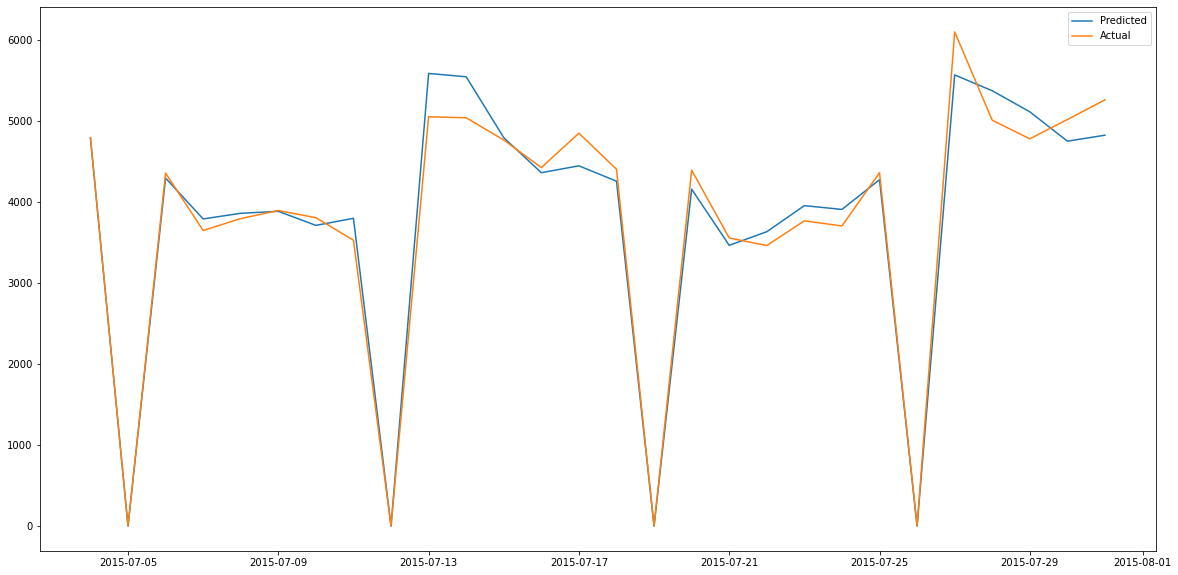

In [101]:
Store_1 = comparison.loc[comparison['Store']==1]

fig, ax = plt.subplots(figsize=(20,10))        

plt.plot(Store_1["Date"],Store_1["Predicted_sales"],label='Predicted')
plt.plot(Store_1["Date"],Store_1["Sales"],label='Actual')
plt.legend()
